In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import arrow
from pathlib import Path
import netCDF4 as nc
from salishsea_tools import visualisations as vis
from salishsea_tools import viz_tools
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cmocean.cm as cm
import pandas as pd
import datetime as dt

In [2]:
dsno3 = xr.open_mfdataset('/ocean/atall/MOAD/rivers-climatology/bio/R201906_bioClim*.nc', concat_dim='time_counter', combine='nested')
dssil = xr.open_mfdataset('/ocean/atall/MOAD/rivers-climatology/bio/RPugetExp_bioClim*.nc', concat_dim='time_counter', combine='nested')
dscons = xr.open_mfdataset('/ocean/atall/MOAD/rivers-climatology/bio/R202101_bioConst.nc')

dssil

<xarray.Dataset>
Dimensions:  (time_counter: 366, y: 898, x: 398)
Dimensions without coordinates: time_counter, y, x
Data variables:
    no3      (time_counter, y, x) float64 dask.array<chunksize=(1, 898, 398), meta=np.ndarray>
    sil      (time_counter, y, x) float64 dask.array<chunksize=(1, 898, 398), meta=np.ndarray>

NH4 =  4.3
NH4 =  4.3


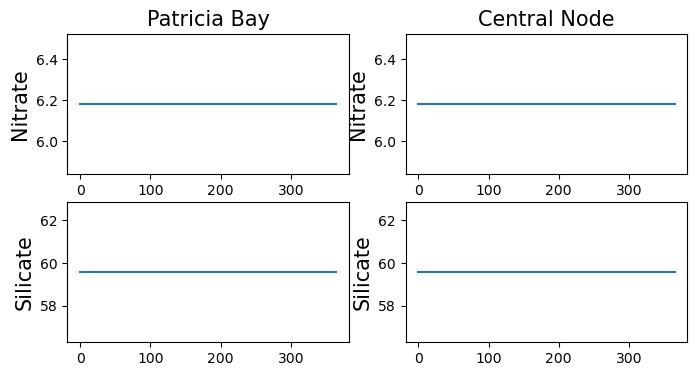

In [3]:
line, col = (2, 2)
fig, ax = plt.subplots(line, col, figsize=(4*line, 2*col))
place = list(['Patricia Bay','Central Node'])
ylabel = list(['Nitrate','Silicate'])
for j in range(0, col):
    if j==0:
        jj, ii = (353, 209)
    else:
        jj, ii = (423, 266)
    
    for i in range(0, line):
            if i==0:
                var = dsno3['no3'][:,jj,ii]
            elif i==1:
                var = dssil['sil'][:,jj,ii]    

            ax[i,j].plot(var.time_counter, var)
            ax[i,j].set_ylabel(f'{ylabel[i]}',fontsize=15)
            ax[0,j].set_title(f'{place[j]}',fontsize=15)
            #ax[i,j].grid()
    print('NH4 = ',np.array(dscons['nh4'][0,jj,ii]))


In [4]:
print(np.array(dscons['pon'][0,jj,ii]),np.array(dscons['don'][0,jj,ii]))

0.0 0.0
